In [3]:
import os, sys
import numpy as np
import pandas as pd

# Lab 2
These exercises focus on Pandas. Work through all exercises, searching for help when you need to (ie. frequently).

In [2]:
import pandas as pd

__EXERCISE 1: Pie shop__

_Objective: Create and manipulate DataFrames_
* Create a DataFrame with three columns: month, apple_pie_sales, blueberry_pie_sales
* Summarize which products sold best
* Create a new column to summarize revenues

In [146]:
# YOUR CODE HERE: create the df using the data supplied

months = ['Jan','Feb', 'Mar', 'Apr']
apple_pie_sales = [34, 19, 28, 45]
blueberry_pie_sales= [18, 6, 15, 51]

df = pd.DataFrame(list(zip(months, apple_pie_sales, blueberry_pie_sales)), columns= ['months', 'apple_pie_sales', 'blueberry_pie_sales'])

In [147]:
df

,months,apple_pie_sales,blueberry_pie_sales
0,Jan,34,18
1,Feb,19,6
2,Mar,28,15
3,Apr,45,51


In [148]:
# YOUR CODE HERE: calculate total sales of apple pies and total sales of blueberry pies
apple_pie_sales=df.apple_pie_sales.sum()
blueberry_pie_sales= df.blueberry_pie_sales.sum()

if apple_pie_sales>blueberry_pie_sales:
    print("apple pies sold best: {} units".format(apple_pie_sales))
elif apple_pie_sales<blueberry_pie_sales:
    print("blueberry pies sold best: {} units".format(blueberry_pie_sales))
elif apple_pie_sales==blueberry_pie_sales:
    print ("both pies were equally popular: {} units".format (apple_pie_sales))

apple pies sold best: 126 units


In [149]:
# YOUR CODE HERE: create a new columns entitled apple_pie_revenue and blueberry_pie_revenue

# Hint: revenue = units sold * price. Use the prices below.

apple_pie_price = 12
blueberry_pie_price = 15

df['apple_pie_revenue']=df['apple_pie_sales']*apple_pie_price
df['blueberry_pie_revenue']=df['blueberry_pie_sales']*blueberry_pie_price
df

,months,apple_pie_sales,blueberry_pie_sales,apple_pie_revenue,blueberry_pie_revenue
0,Jan,34,18,408,270
1,Feb,19,6,228,90
2,Mar,28,15,336,225
3,Apr,45,51,540,765


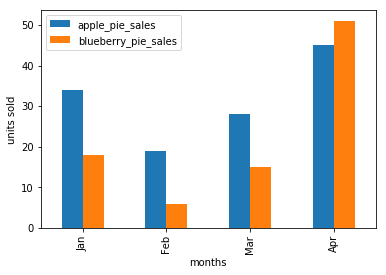

In [155]:
# BONUS: find a way to plot bar charts and pie charts (ha) of the shop's sales
import matplotlib.pyplot as plt
df[['months','apple_pie_sales','blueberry_pie_sales']].plot(x='months',kind="bar")
plt.ylabel("units sold")
plt.show()

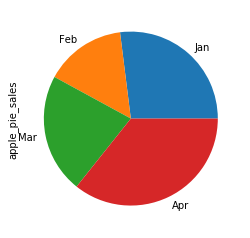

In [174]:
df.plot(kind="pie", y='apple_pie_sales', labels=months, legend=False)
plt.show()

__EXERCISE 2: NYC housing__

_Objective: clean and manipulate a real-world dataset_

We are using the PLUTO (Primary Land Use Tax Lot Output) database, which lists every building in New York City.
Source is [NYC Open Data Portal](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page). Check the [data dictionary](https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=18v2beta).

In [4]:
url = 'https://github.com/worldbank/Python-for-Data-Science/raw/master/Spring%202019%208-week%20course/week%203/pluto_shorter.csv'
df = pd.read_csv(url)

C:\WBG\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,21,23,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


__Step 1: Inspect and prepare the dataset__

In [5]:
# Use df.head() to see the first five rows. A bit messy, no?
df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [6]:
# We'll select some columns to keep
df.columns

Index(['Unnamed: 0', 'borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010',
       'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healtharea', 'sanitboro', 'sanitsub', 'address', 'zonedist1',
       'zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2',
       'spdist1', 'spdist2', 'spdist3', 'ltdheight', 'splitzone', 'bldgclass',
       'landuse', 'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype',
       'bsmtcode', 'assessland', 'assesstot', 'exemptland', 'exempttot',
       'yearbuilt', 'yearalter1', 'yearalter2', 'histdist', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl',
       'condono', 'tract2010', 'xcoord', 'ycoord'

In [7]:
# Note how this syntax works. You could add extra columns that interest you.
my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'assesstot', 'xcoord','ycoord']
df = df[my_cols]

In [8]:
# Cleaner now, right?
df.head()

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,BX,0.00,0.0,7.0,NaN,59400.0,1044510.0,246734.0
1,QN,2.50,1925.0,1.0,11357.0,29738.0,1035479.0,223657.0
2,BK,2.75,1920.0,1.0,11208.0,27370.0,1015989.0,187871.0
3,MN,6.00,1900.0,2.0,10025.0,510300.0,994273.0,228915.0
4,QN,2.00,1901.0,1.0,11421.0,29020.0,1021269.0,190793.0


In [9]:
# Here is the key that translates NYC's land use codes into plain English (p. 17 of the data dictionary)
# We'll use the df.map() method to replace the numbers with text we can understand

# BONUS POINTS: repeat this step to substitute the short borough names (eg. MN) with the actual
# full borough names (eg. MN becomes Manhattan).

land_use_dict = {1: 'One & Two Family Buildings',
                2: 'Multi-Family Walk-Up Buildings',
                3: 'Multi-Family Elevator Buildings',
                4: 'Mixed Residential & Commercial Buildings',
                5: 'Commercial & Office Buildings',
                6: 'Industrial & Manufacturing',
                7: 'Transportation & Utility',
                8: 'Public Facilities & Institutions',
                9: 'Open Space & Outdoor Recreation',
                10: 'Parking Facilities',
                11: 'Vacant Land'}

df['landuse'] = df['landuse'].map(land_use_dict)

In [10]:
# Cleaner now, right? Add any more data cleaning steps of your choice.

df.head()

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,BX,0.00,0.0,Transportation & Utility,NaN,59400.0,1044510.0,246734.0
1,QN,2.50,1925.0,One & Two Family Buildings,11357.0,29738.0,1035479.0,223657.0
2,BK,2.75,1920.0,One & Two Family Buildings,11208.0,27370.0,1015989.0,187871.0
3,MN,6.00,1900.0,Multi-Family Walk-Up Buildings,10025.0,510300.0,994273.0,228915.0
4,QN,2.00,1901.0,One & Two Family Buildings,11421.0,29020.0,1021269.0,190793.0


__Step 2: Summarize data using mean(), min/max(), describe() etc.__
* Find out the average price of a building in Manhattan (MN) compared with Queens (QN)
* What was the most expensive building built in the year you were born?
* Compare average building

BONUS: find the average price for buildings in Brooklyn with 5-10 floors built between 2000-2010. Do the same for buildings in Manhattan and Queens with those characteristics.

In [11]:
# YOUR CODE HERE:

print("average price in brooklyn:", df[(df.borough=="BK")&(df.numfloors>=5)&\
    (df.numfloors<=10)&(df.yearbuilt>=2000)&(df.yearbuilt<=2010)]\
     ['assesstot'].mean())

print("average price in manhattan:", df[(df.borough=="MN")&(df.numfloors>=5)&\
    (df.numfloors<=10)&(df.yearbuilt>=2000)&(df.yearbuilt<=2010)]\
     ['assesstot'].mean())

print("average price in queens:", df[(df.borough=="QN")&(df.numfloors>=5)&\
    (df.numfloors<=10)&(df.yearbuilt>=2000)&(df.yearbuilt<=2010)]\
     ['assesstot'].mean())


average price in brooklyn: 2225754.603448276
average price in manhattan: 4267863.0869565215
average price in queens: 2035399.652173913


__Step 3: Exploratory visualization using Pandas plotting__

In [12]:
# Try using the function pandas.Series.value_counts
# It returns the unique count of values in a column
# BONUS: Could you produce this output only for Brooklyn?

df.landuse.value_counts()

One & Two Family Buildings                  28259
Multi-Family Walk-Up Buildings               6408
Mixed Residential & Commercial Buildings     2813
Vacant Land                                  1358
Commercial & Office Buildings                1060
Multi-Family Elevator Buildings               639
Public Facilities & Institutions              633
Industrial & Manufacturing                    544
Parking Facilities                            520
Transportation & Utility                      351
Open Space & Outdoor Recreation               231
Name: landuse, dtype: int64

In [13]:
df[df.borough=="BK"].landuse.value_counts()

One & Two Family Buildings                  7899
Multi-Family Walk-Up Buildings              3192
Mixed Residential & Commercial Buildings    1270
Vacant Land                                  292
Commercial & Office Buildings                277
Industrial & Manufacturing                   216
Public Facilities & Institutions             202
Multi-Family Elevator Buildings              176
Parking Facilities                           175
Transportation & Utility                      93
Open Space & Outdoor Recreation               40
Name: landuse, dtype: int64

__YOUR ACTION__: Look up the [pandas.Series.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) function, and some [examples of how to use it](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Explore any questions that interest you about New York City's buildings by plotting charts, for example:
* How does price vary with age? (scatter of age vs. price)
* Does the breakdown of building types differ between boroughs? (pie chart of landuse)
* Which zip codes have most and fewest buildings?
* Where are the buildings located? (hint: try a scatter plot of xcoord and ycoord)


**How does price vary with age? (scatter of age vs. price)**

In [14]:
# YOUR CODE HERE:
import matplotlib.pyplot as plt
df[['yearbuilt','assesstot']].plot(kind="scatter", x="yearbuilt", y="assesstot")

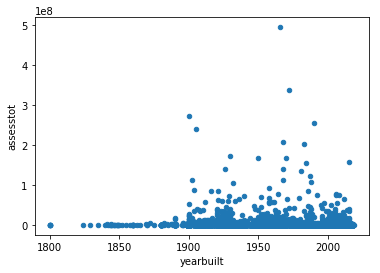

In [15]:
# Remove outliers
df_new=df[df.yearbuilt>1700]
df_new[['yearbuilt','assesstot']].plot(kind="scatter", x="yearbuilt", y="assesstot")


**Does the breakdown of building types differ between boroughs? (pie chart of landuse)**

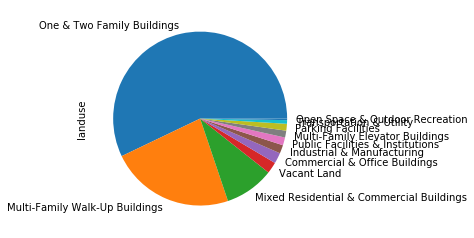

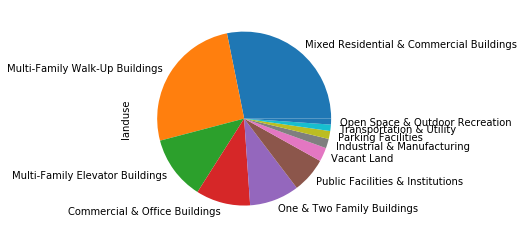

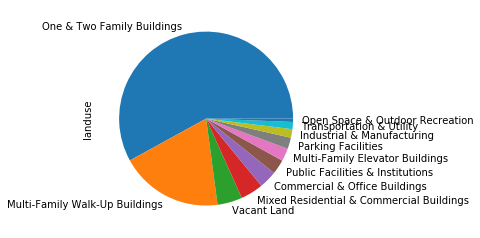

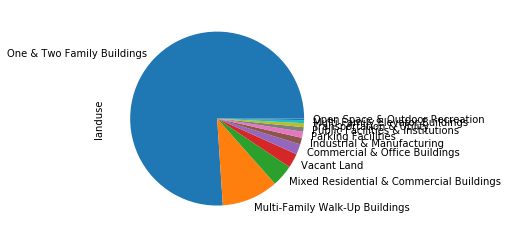

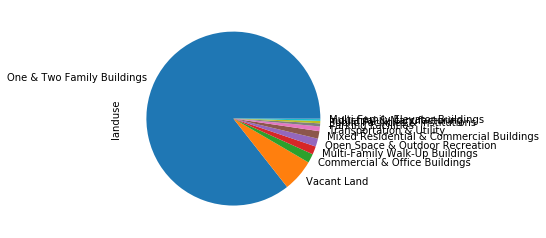

In [16]:
plt.figure(0)
df[df.borough=="BK"].landuse.value_counts().plot(kind="pie")
plt.figure(1)
df[df.borough=="MN"].landuse.value_counts().plot(kind="pie")
plt.figure(2)
df[df.borough=="BX"].landuse.value_counts().plot(kind="pie")
plt.figure(3)
df[df.borough=="QN"].landuse.value_counts().plot(kind="pie")
plt.figure(4)
df[df.borough=="SI"].landuse.value_counts().plot(kind="pie")
plt.show()

**Which zip codes have most and fewest buildings?**

In [52]:
df_zip=df.groupby('zipcode')['zipcode'].agg(["count"]).reset_index().sort_values(by="count",ascending=False)

In [34]:
df_zip.loc[df_zip["count"].idxmax()]

zipcode    10314.0
count        973.0
Name: 57, dtype: float64

In [19]:
df_zip.loc[df_zip["count"].idxmin()]

zipcode    10069.0
count          1.0
Name: 39, dtype: float64

In [41]:
# alternately:
df_zipped=df.zipcode.value_counts().reset_index().rename(columns={"index":"zipcode", "zipcode":"count"})

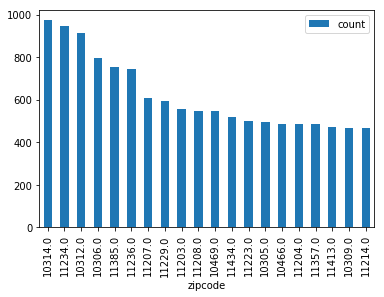

In [73]:
df_zip.head(20).plot(x='zipcode', y='count', kind="bar")
plt.show()

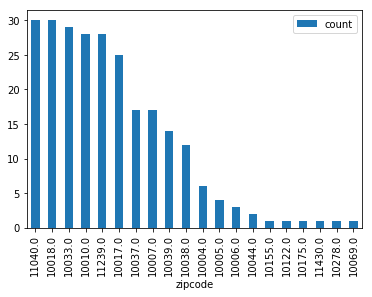

In [74]:
df_zip.tail(20).plot(x='zipcode', y='count', kind="bar")
plt.show()

**Where are the buildings located? (hint: try a scatter plot of xcoord and ycoord)**

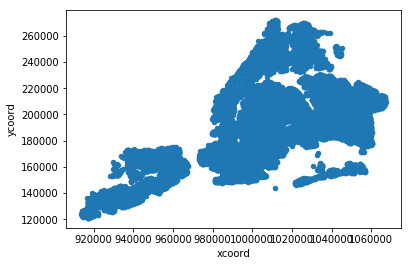

In [286]:
df.plot(kind="scatter", x="xcoord", y="ycoord")
plt.show()

#### BONUS ADVANCED QUESTION!
Impute missing values for year_built using a custom strategy:
* Replace all NaNs with the mean year_built for buildings of the same `landuse`.
* More advanced version: replace all NaNs with mean `year_built` for buildings of the same `landuse` in the same borough. (eg. multi-family buildings in Brooklyn)

In [303]:
df.isnull().sum()

borough         0
numfloors      30
yearbuilt      20
landuse       134
zipcode      1050
assesstot      20
xcoord         52
ycoord         52
dtype: int64